# Exercícios - Estatística I

### Questão 1

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência absoluta para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

Carregando as principais bibliotecas que iremos utilizar:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.load_dataset('titanic')

In [5]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Questão 2

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Calcule a frequência relativa, relativa percentual e acumulativa para os sobreviventes no _Titanic_.

__Dica.:__ Utilize a função `.value_counts()`

In [9]:
data['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [10]:
freq_table = pd.concat([data.alive.value_counts(),
                        round(data.alive.value_counts(normalize = True),3)],
                       axis = 1,
                       keys = ("freq", "freq_relativa"))
freq_table

,freq,freq_relativa
no,549,0.616
yes,342,0.384


In [11]:
freq_table['freq_percentual'] = freq_table['freq_relativa']*100
freq_table

,freq,freq_relativa,freq_percentual
no,549,0.616,61.6
yes,342,0.384,38.4


In [12]:
freq_table['freq_acumulada'] = freq_table['freq_percentual'].cumsum()
freq_table

,freq,freq_relativa,freq_percentual,freq_acumulada
no,549,0.616,61.6,61.6
yes,342,0.384,38.4,100.0


### Questão 3

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Utilizando a coluna `Age` do _dataset Titanic_, defina as principais métricas estatísticas para essa variável tais como:
- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

In [13]:
data.age.mean()

29.69911764705882

In [15]:
data.age.std()

14.526497332334042

In [23]:
data.age.min()

0.42

In [16]:
data.age.median()

28.0

In [20]:
data.age.quantile(0.25)

20.125

In [21]:
data.age.quantile(0.50)

28.0

In [22]:
data.age.quantile(0.75)

38.0

In [24]:
data.age.quantile(0.75) - data.age.quantile(0.25)

17.875

In [25]:
data.age.max()

80.0

In [26]:
data.age.skew()

0.38910778230082704

In [37]:
data.age.mode()[0]

24.0

In [30]:
data.age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

### Questão 4

In [62]:
data.age.value_counts(0)

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [68]:
data_age = data.age.value_counts()
type(data_age)

pandas.core.series.Series

In [69]:
data_age.head()

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: age, dtype: int64

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Crie um gráfico da dispersão das idades dos passageiros do _Titanic_ e identifique os pontos onde se encontram a média, mediana e moda das idades.

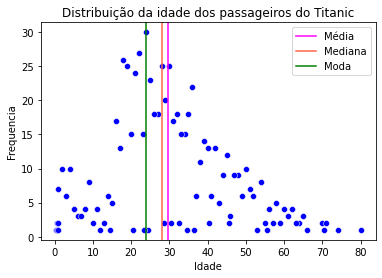

In [78]:
ages = data['age'].value_counts().to_dict()
sns.scatterplot(data=data, x=ages.keys(), y=ages.values(), color='b')
#sns.scatterplot(data=data, x=data.age, y=data_age.value_counts().to_dict()[0])
# plotando a mediana
plt.axvline(data["age"].mean(), color="magenta", label="Média")
plt.xlabel("Idade")
plt.axvline(data["age"].median(), color="tomato", label="Mediana")
plt.ylabel("Frequencia")
plt.axvline(data["age"].mode()[0], color="green", label="Moda")

plt.title('Distribuição da idade dos passageiros do Titanic')

# Cria uma legenda
plt.legend()

plt.show()

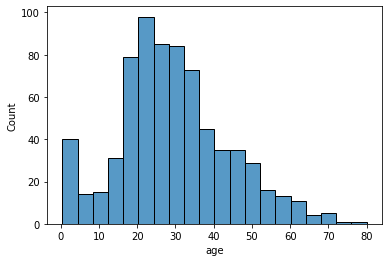

In [52]:
sns.histplot(data=data.age)

### Questão 5

Os exercícios de 1 a 5 serão desenvolvidos utilizando o _dataset_ `Titanic.csv`:
    
Ainda trabalhando com os valores das idades crie três _Boxplots_:
- _Boxplot_ das idades para todos os passageiros;
- _Boxplot_ das idades dos passageiros separados pelo sexo.
- _Boxplot_ das idades dos passageiros separados pelo sexo e por sobreviventes.

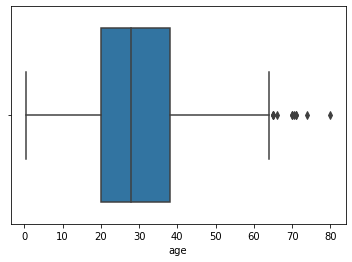

In [81]:
sns.boxplot(data=data, x='age')

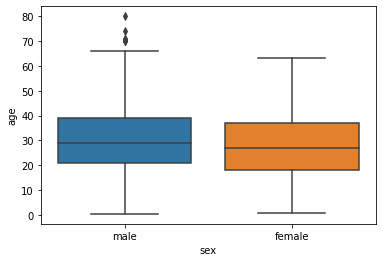

In [83]:
 sns.boxplot(x="sex", y="age", data=data)

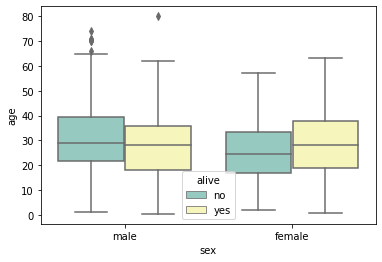

In [84]:
sns.boxplot(x="sex", y="age", hue="alive",
                 data=data, palette="Set3")

Com o dataset `penguins`, responda as questões abaixo:

sns.load_dataset('penguins')

In [86]:
data = sns.load_dataset('penguins')

### Questão 6

Classifique o tipo de dado de cada coluna

In [88]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
species, island, sex = qualitativa nominal
bill_length_mm, bill_depth_mm, 	flipper_length_mm, body_mass_g = quantitativa contínua.


### Questão 7
Calcule a frequência absoluta para cada espécie de pinguim

In [92]:
freq_table = pd.concat([data.species.value_counts(),
                        round(data.species.value_counts(normalize = True), 3)],
                       axis = 1,
                       keys = ("freq", "freq_relativa"))
freq_table

,freq,freq_relativa
Adelie,152,0.442
Gentoo,124,0.360
Chinstrap,68,0.198


### Questão 8
Calcule a frequência relativa, relativa percentual e acumulativa para os sobreviventes no Titanic

In [93]:
freq_table['freq_percentual'] = freq_table['freq_relativa']*100
freq_table

,freq,freq_relativa,freq_percentual
Adelie,152,0.442,44.2
Gentoo,124,0.360,36.0
Chinstrap,68,0.198,19.8


In [94]:
freq_table['freq_acumulada'] = freq_table['freq_percentual'].cumsum()
freq_table

,freq,freq_relativa,freq_percentual,freq_acumulada
Adelie,152,0.442,44.2,44.2
Gentoo,124,0.360,36.0,80.2
Chinstrap,68,0.198,19.8,100.0


### Questão 9
Utilizando a coluna `body_mass_g` do dataset Penguins, defina as principais métricas estatísticas para essa variável tais como:

- Média;
- Desvio Padrão;
- Mínimo;
- Primeiro Quartil;
- Segundo Quartil (Mediana);
- Terceiro Quartil;
- Distância Interquartil (IQR);
- Máximo;
- Skewness;
- Moda.

In [95]:
data["body_mass_g"].mean()

4201.754385964912

In [96]:
data["body_mass_g"].std()

801.9545356980956

In [97]:
data["body_mass_g"].min()

2700.0

In [99]:
data["body_mass_g"].quantile(0.25)

3550.0

In [101]:
data["body_mass_g"].median()

4050.0

In [103]:
data["body_mass_g"].quantile(0.75)

4750.0

In [104]:
data["body_mass_g"].quantile(0.75) - data["body_mass_g"].quantile(0.25)

1200.0

In [106]:
data["body_mass_g"].mode()[0]

3800.0

In [105]:
data["body_mass_g"].skew()

0.470329330480123

In [107]:
data["body_mass_g"].max()

6300.0

### Questão 10
Crie um gráfico da dispersão da massa dos pinguins e identifique os pontos onde se encontram a média, mediana e moda das idades.

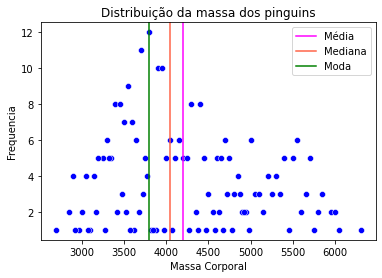

In [110]:
massa = data['body_mass_g'].value_counts().to_dict()
sns.scatterplot(data=data, x=massa.keys(), y=massa.values(), color='b')
#sns.scatterplot(data=data, x=data.age, y=data_age.value_counts().to_dict()[0])
# plotando a mediana
plt.axvline(data['body_mass_g'].mean(), color="magenta", label="Média")
plt.xlabel("Massa Corporal")
plt.axvline(data['body_mass_g'].median(), color="tomato", label="Mediana")
plt.ylabel("Frequencia")
plt.axvline(data['body_mass_g'].mode()[0], color="green", label="Moda")

plt.title('Distribuição da massa dos pinguins')

# Cria uma legenda
plt.legend()

plt.show()

### Questão 11
Ainda trabalhando com os valores das massas dos pinguins crie três Boxplots:

- Boxplot das massas para todos os pinguins
- Boxplot das massas dos pinguins separados pelo sexo.
- Boxplot das massas dos pinguins separados pelo sexo e pela espécies.

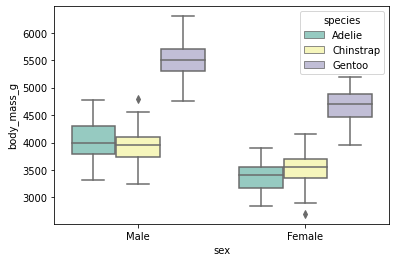

In [112]:
sns.boxplot(x="sex", y="body_mass_g", hue="species",
                 data=data, palette="Set3")

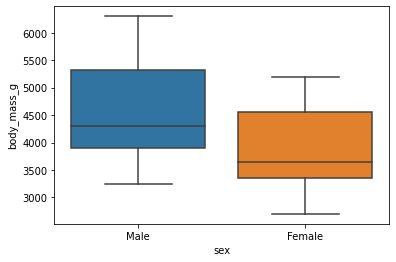

In [113]:
 sns.boxplot(x="sex", y="body_mass_g", data=data)

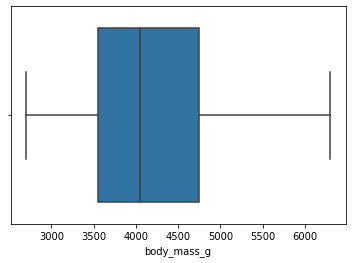

In [111]:
sns.boxplot(data=data, x='body_mass_g')